In [20]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [21]:

initial_data = yf.download("XRP-USD", start="2020-04-01", end="2022-04-01") # downlading the data from yahoo finacne

[*********************100%***********************]  1 of 1 completed


In [22]:
initial_data.head()#showing the first 5 data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-31,0.172134,0.177883,0.171549,0.174563,0.174563,2101862050
2020-04-01,0.174315,0.175323,0.169134,0.175323,0.175323,2053108172
2020-04-02,0.175180,0.183321,0.174310,0.178640,0.178640,2352651038
2020-04-03,0.178769,0.182728,0.176886,0.179467,0.179467,2106869711
2020-04-04,0.179612,0.182300,0.178305,0.181732,0.181732,1793826153


In [23]:
initial_data[['Adj Close']].head()

,Adj Close
Date,
2020-03-31,0.174563
2020-04-01,0.175323
2020-04-02,0.178640
2020-04-03,0.179467
2020-04-04,0.181732


In [24]:
data =  initial_data[['Adj Close']]
data.head()

,Adj Close
Date,
2020-03-31,0.174563
2020-04-01,0.175323
2020-04-02,0.178640
2020-04-03,0.179467
2020-04-04,0.181732


In [25]:
data.describe().round(2)   #showig stats

,Adj Close
count,731.00
mean,0.63
std,0.38
min,0.17
25%,0.25
50%,0.60
75%,0.89
max,1.84


array([<AxesSubplot:xlabel='Date'>], dtype=object)

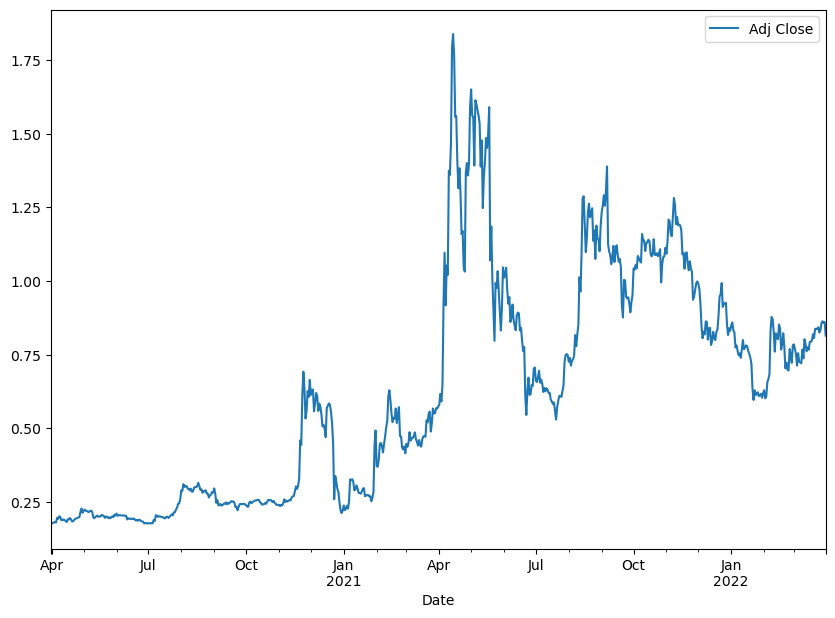

In [26]:
data.plot(figsize=(10, 7), subplots=True) #plotting the movement of the stock

In [27]:
log_return = np.log(initial_data['Adj Close'] / initial_data['Adj Close'].shift(1)) #calculating the volaltilty of the stock

In [28]:
vol = log_return.std()    #daily volatility
print('The daily volatility is', round(vol*100,2), '%')

The daily volatility is 6.81 %


In [29]:
vol = np.sqrt(252) * log_return.std()  #annualised volatility
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 108.11 %


array([<AxesSubplot:xlabel='Date'>], dtype=object)

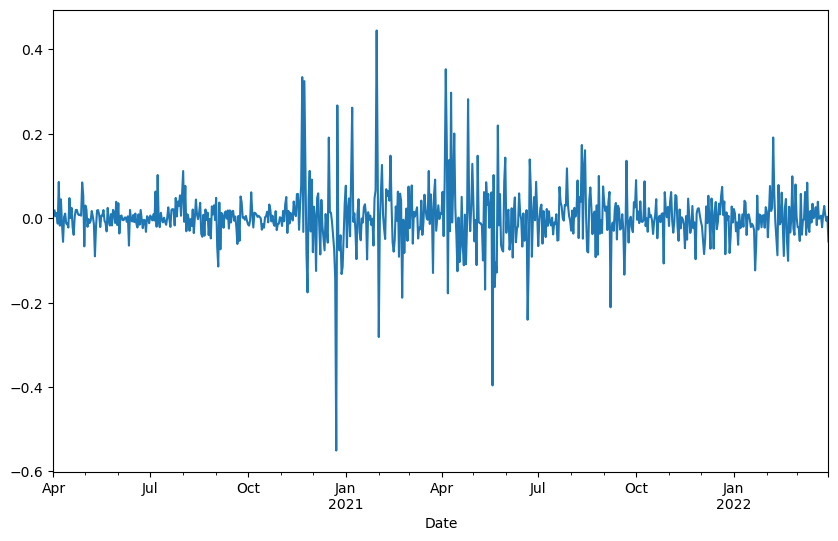

In [30]:
log_return.dropna(inplace=True) #volatility graph
log_return.plot(subplots=True, figsize=(10, 6))

In [31]:
last_six_vol = round(data['Adj Close'][125:].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The last six months volatility is', last_six_vol, '%')   # last six months volatility

The last six months volatility is 116.82 %


In [32]:
first_six_vol = round(data['Adj Close'][:125].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The first six months volatility is', first_six_vol, '%') # first six months volatility

The first six months volatility is 46.17 %


# Question 2


# methodology

# BINOMIAL OPTION PRICING

In [33]:
S = initial_data['Adj Close'][-1]
print('The spot price is', round(S,2))  # getting the spot price

The spot price is 0.81


In [34]:
S0 = 0.81           # spot stock price
K = 1.0               # strike price
T = 1/24               # time to maturity 
r = 0.0169                # risk free rate 
sig = 1.08              # annaulised volatility
N = 5                   # number of time steps of the tree
payoff = "call"          # payoff 


In [35]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up probability factor
d = 1.0 / u 


In [36]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [37]:
S

array([[0.81      , 0.89392717, 0.98655036, 1.08877058, 1.20158223,
        1.32608272],
       [0.        , 0.73395241, 0.81      , 0.89392717, 0.98655036,
        1.08877058],
       [0.        , 0.        , 0.66504461, 0.73395241, 0.81      ,
        0.89392717],
       [0.        , 0.        , 0.        , 0.60260629, 0.66504461,
        0.73395241],
       [0.        , 0.        , 0.        , 0.        , 0.54603005,
        0.60260629],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.49476552]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

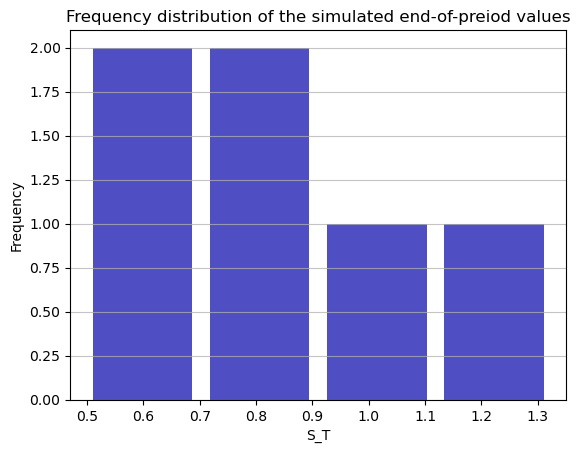

In [38]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [39]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European call', str(p))

European call 0.2124581022006493


# MONTE CARLO SIMULTION

In [40]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [41]:
T = 1/12
r = 0.0169
sigma = 1.09
S0 = 0.81
K = 1.0

In [42]:
S = mcs_simulation_np(10000)    #number of simulations

In [43]:
S = np.transpose(S)
S


array([[0.81      , 0.80757073, 0.80759061, ..., 0.79809156, 0.79745967,
        0.7963892 ],
       [0.81      , 0.80836652, 0.81041798, ..., 0.62177508, 0.62365204,
        0.62286022],
       [0.81      , 0.81053274, 0.81319597, ..., 0.50928239, 0.51008474,
        0.51145782],
       ...,
       [0.81      , 0.81090177, 0.81588615, ..., 1.10115086, 1.098816  ,
        1.09526969],
       [0.81      , 0.81094765, 0.80880466, ..., 0.6342435 , 0.63451779,
        0.63495368],
       [0.81      , 0.8136564 , 0.81140317, ..., 0.81675128, 0.82238941,
        0.81830209]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

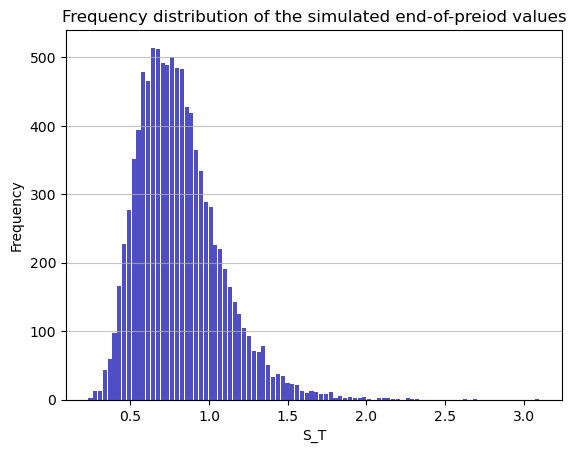

In [44]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')


In [45]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European call', str(p))


European call 0.23129608394305032


# GREEKS

# DELTA

In [46]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [48]:
delta(0.81, 1.0, 1/24, 0.0169, 0.0055, 1.08, 'call') # value of delta


0.1994375766058432

In [54]:
d = delta(0.81, 1.0, 1/24, 0.0169, 0.0055, 1.08, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.1994 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.1994 .


# GAMMA

In [55]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [56]:
gamma(0.81, 1.0, 1/24, 0.0169, 0.0055, 1.08, 'call') #value of gamma

1.5650218669830853

In [61]:
d = gamma(0.81, 1.0, 1/24, 0.0169, 0.0055, 1.08, 'call')
print('The value of Gamma is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')


The value of Gamma is 1.565 . If the stock price increase 1 dollar, then the value of the option will increase $ 1.565 .


# RHO

In [59]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [62]:
rho(0.81, 1.0, 1/24, 0.0169, 0.0055, 1.08, 'call') #value of rho

0.005982532754247216

In [63]:
r = rho(0.81, 1.0, 1/24, 0.0169, 0.0055, 1.08, 'call')
print('The value of Rho is', r.round(4),'.','If the interest rate increases 1%, then the value of the option will increase $', r.round(4)*0.01, '.')


The value of Rho is 0.006 . If the interest rate increases 1%, then the value of the option will increase $ 6e-05 .


# VEGA 

In [64]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [68]:
vega(0.81, 1.0, 1/24, 0.0169, 0.0055, 1.08, 'call')  #value of vega
  #value of vega

0.04620648811174211

In [72]:
v = vega(0.81, 1.0, 1/24, 0.0169, 0.0055, 1.08, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')


The value of Vega is 0.0462 . If the volatility increases 1%, then the value of the option will increase $ 0.000462 .


# THETA

In [74]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta


In [78]:
theta(0.81, 1.0, 1/24, 0.0169, 0.0055, 1.08, 'call') #value of theta 

0.6003741068095215

In [79]:
t = theta(0.81, 1.0, 1/24, 0.0169, 0.0055, 1.08, 'call')
print('The value of Theta is', t.round(4),'.','If the time increases 1 year, then the value of the option will increase $', t.round(4)*0.01, '.')

The value of Theta is 0.6004 . If the time increases 1 year, then the value of the option will increase $ 0.006004000000000001 .
